**We will try 3 types of models - **
1. BOW model, Tf-idf
2. Word embeddings (GLOVE, Word2Vec, FastText)
3. RNN, LSTM, BiDirectional GRU, SImple RNN, Stacked LSTM

**Experiment 1 **

1. Mix all the paragraphs and split the data to a 80-20 split
2. Build the 3 models listed earlier and compute the confusion matrix for the training and testing datasets.
3. Discuss how your models perform.


In [2]:
import pandas as pd
import keras 
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.activations import relu
from keras.optimizers import adam, adadelta
from keras.layers import Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize

In [15]:
transcript = pd.read_csv('Earnings_Call_Transcript.csv')
transcript.drop(columns='Unnamed: 0', axis=1).head()

,sentiment,text
0,positive,thank good welcome conference call fourth quar...
1,positive,look past expect channel inventory correction ...
2,neutral,last question come line harlan sur jp
3,negative,china game slow economic environment governmen...
4,negative,know could tear tease know consumer market rel...


In [17]:
transcript['text'] = transcript['text'].astype(str)

In [5]:
transcript['sentiment'].value_counts()

neutral     833
positive    654
negative    157
Name: sentiment, dtype: int64

In [6]:
tokens = text_to_word_sequence(transcript['text'][0])
tokens

['thank',
 'good',
 'welcome',
 'conference',
 'call',
 'fourth',
 'quarter',
 'fiscal',
 'call',
 'today',
 'nvidia',
 'president',
 'chief',
 'executive',
 'officer',
 'colette',
 'executive',
 'vice',
 'president',
 'chief',
 'financial',
 'like',
 'remind',
 'call',
 'webcast',
 'live',
 'investor',
 'relation',
 'web']

In [11]:
type(transcript['text'][0])

str

In [13]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(transcript['text'].astype('str'))

In [29]:
sequence = tokenizer.texts_to_sequences(transcript['text'])
data = pad_sequences(sequence, maxlen= 50)
data

array([[   0,    0,    0, ...,  314,  808, 1105],
       [ 354, 1566,  929, ..., 2383,  366,   73],
       [   0,    0,    0, ..., 2384, 2385, 1840],
       ...,
       [   0,    0,    0, ...,    0,  927, 1550],
       [   0,    0,    0, ...,   28,   96, 1902],
       [   0,    0,    0, ...,    0,  353,  482]])

In [30]:
data.shape

(1644, 50)

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(transcript['sentiment'])
labels

array([2, 2, 1, ..., 1, 0, 1], dtype=int64)

In [34]:
labels.shape

(1644,)

Lets us start building our first model using Logistic Regression

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [37]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test, 3)

In [41]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [47]:
from keras.layers import Embedding
from keras.layers import Flatten
from keras.models import Sequential

maxlen = 50

model_fc = Sequential()
model_fc.add(Embedding(10000, 64, input_length=maxlen))
model_fc.add(Flatten())
model_fc.add(Dense(64, activation='relu'))
model_fc.add(Dropout(0.35))
model_fc.add(Dense(3, activation='softmax'))

model_fc.summary()
model_fc.compile(optimizer= adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 64)            640000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                204864    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 845,059
Trainable params: 845,059
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model_fc.fit(x_train, y_train, batch_size=5, epochs= 10, validation_split=0.2)

Train on 1052 samples, validate on 263 samples
Epoch 1/10
1052/1052 [==============================] - 3s 3ms/step - loss: 0.9352 - acc: 0.5076 - val_loss: 0.8750 - val_acc: 0.5475
Epoch 2/10
1052/1052 [==============================] - 2s 2ms/step - loss: 0.8342 - acc: 0.6492 - val_loss: 0.8483 - val_acc: 0.5551
Epoch 3/10
1052/1052 [==============================] - 3s 3ms/step - loss: 0.7941 - acc: 0.7101 - val_loss: 0.8404 - val_acc: 0.5589
Epoch 4/10
1052/1052 [==============================] - 3s 3ms/step - loss: 0.7713 - acc: 0.7348 - val_loss: 0.8364 - val_acc: 0.5475
Epoch 5/10
1052/1052 [==============================] - 3s 3ms/step - loss: 0.7386 - acc: 0.7652 - val_loss: 0.8308 - val_acc: 0.5741 0.7508 - acc: 0.75 - ETA: 0s - loss: 0.7487 - 
Epoch 6/10
1052/1052 [==============================] - 4s 4ms/step - loss: 0.6842 - acc: 0.8051 - val_loss: 0.8240 - val_acc: 0.5779
Epoch 7/10
1052/1052 [==============================] - 3s 3ms/step - loss: 0.6253 - acc: 0.8451 - val

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


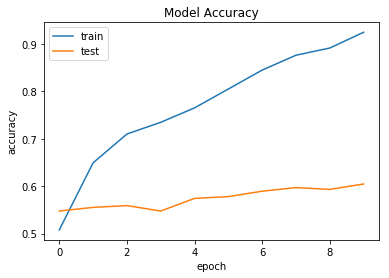

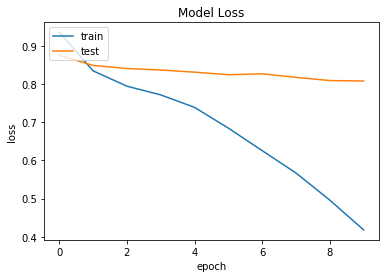

In [49]:
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [50]:
model_fc.predict(x_test)

array([[0.07986826, 0.36650303, 0.55362874],
       [0.01272761, 0.9109222 , 0.07635027],
       [0.00662958, 0.96799904, 0.02537141],
       [0.01225212, 0.9214258 , 0.06632202],
       [0.11515717, 0.3800054 , 0.5048375 ],
       [0.08105598, 0.41998404, 0.49896005],
       [0.09691606, 0.30806246, 0.5950215 ],
       [0.13428032, 0.22814491, 0.63757473],
       [0.0092449 , 0.9488796 , 0.04187546],
       [0.11807398, 0.22526267, 0.65666336],
       [0.21880488, 0.39336523, 0.38782993],
       [0.13278277, 0.34683806, 0.5203791 ],
       [0.08629051, 0.35385135, 0.55985814],
       [0.05936605, 0.68010443, 0.26052958],
       [0.01372334, 0.89855003, 0.08772667],
       [0.17079338, 0.23768501, 0.5915216 ],
       [0.16148375, 0.23542719, 0.60308903],
       [0.00829866, 0.95871997, 0.03298134],
       [0.08364436, 0.5471383 , 0.3692173 ],
       [0.08109477, 0.23396382, 0.6849415 ],
       [0.01068577, 0.9339569 , 0.05535736],
       [0.13081755, 0.3412974 , 0.5278851 ],
       [0.

In [51]:
y_pred = model_fc.predict_classes(x_test)
y_pred

array([2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2,

In [57]:
y_test_new = y_test.argmax(axis=1)
y_test_new

array([2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0,
       1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2,

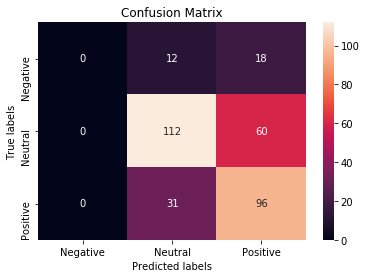

In [58]:
import matplotlib.pyplot as plt     
import seaborn as sns
from sklearn.metrics import confusion_matrix

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test_new, y_pred), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); 
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        30
          1       0.72      0.65      0.69       172
          2       0.55      0.76      0.64       127

avg / total       0.59      0.63      0.60       329



C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


** SimpleRNN **

In [52]:
#from keras.utils import to_categorical

#y_train = keras.utils.to_categorical(y_train , num_classes=3).astype('float32')
#y_test = keras.utils.to_categorical(y_test , num_classes=3).astype('float32')

In [61]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [62]:
y_train.shape

(1315, 3)

In [68]:
from keras.models import Sequential
from keras.layers import SimpleRNN

max_features = 10000

model_sr = Sequential()

model_sr.add(Embedding(max_features, 64, input_length= maxlen))
model_sr.add(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2, activation='tanh', return_sequences=True))
model_sr.add(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2, activation='tanh'))
model_sr.add(Dense(3, activation='softmax'))

model_sr.summary()
model_sr.compile(optimizer= adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 64)            640000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 50, 64)            8256      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 656,707
Trainable params: 656,707
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model_sr.fit(x_train, y_train, validation_split = 0.2, epochs=20, batch_size=2)

Train on 1052 samples, validate on 263 samples
Epoch 1/20
1052/1052 [==============================] - 12s 12ms/step - loss: 1.2055 - acc: 0.3394 - val_loss: 0.9784 - val_acc: 0.5285
Epoch 2/20
1052/1052 [==============================] - 14s 13ms/step - loss: 1.0918 - acc: 0.4392 - val_loss: 0.9297 - val_acc: 0.4981
Epoch 3/20
1052/1052 [==============================] - 15s 14ms/step - loss: 1.0397 - acc: 0.4781 - val_loss: 0.9659 - val_acc: 0.5019
Epoch 4/20
1052/1052 [==============================] - 16s 15ms/step - loss: 1.0022 - acc: 0.4781 - val_loss: 0.9677 - val_acc: 0.5019
Epoch 5/20
1052/1052 [==============================] - 15s 15ms/step - loss: 0.9821 - acc: 0.4962 - val_loss: 0.9681 - val_acc: 0.4981
Epoch 6/20
1052/1052 [==============================] - 17s 16ms/step - loss: 0.9525 - acc: 0.5133 - val_loss: 0.9599 - val_acc: 0.5019
Epoch 7/20
1052/1052 [==============================] - 16s 15ms/step - loss: 0.9539 - acc: 0.4962 - val_loss: 0.9555 - val_acc: 0.4981
E

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


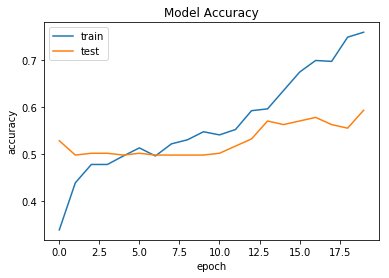

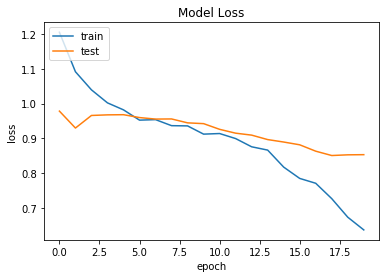

In [70]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [71]:
y_pred = model_sr.predict(x_test)
y_pred

array([[0.070812  , 0.663006  , 0.266182  ],
       [0.03858693, 0.79912615, 0.16228692],
       [0.01383046, 0.97484845, 0.01132103],
       [0.03845609, 0.7725454 , 0.18899843],
       [0.10021282, 0.5670142 , 0.3327729 ],
       [0.06664679, 0.3092317 , 0.62412155],
       [0.08013   , 0.57012534, 0.3497447 ],
       [0.05364554, 0.29751185, 0.6488427 ],
       [0.02803905, 0.91035557, 0.06160537],
       [0.08220486, 0.34981447, 0.5679807 ],
       [0.06304465, 0.3977889 , 0.53916645],
       [0.07888456, 0.64375967, 0.27735585],
       [0.12858878, 0.48678398, 0.38462716],
       [0.0767717 , 0.5963235 , 0.32690483],
       [0.04684265, 0.8342808 , 0.11887661],
       [0.0674135 , 0.38515517, 0.5474313 ],
       [0.06363107, 0.7603772 , 0.17599168],
       [0.01729022, 0.96242356, 0.02028617],
       [0.07563712, 0.27458978, 0.6497731 ],
       [0.06093457, 0.20557949, 0.73348594],
       [0.03540618, 0.8102762 , 0.15431762],
       [0.06332757, 0.63396746, 0.30270496],
       [0.

In [77]:
y_pred = model_sr.predict_classes(x_test)
y_pred

array([1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2,

In [78]:
print(classification_report(y_test.argmax(axis=1), y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        30
          1       0.64      0.70      0.67       172
          2       0.53      0.57      0.55       127

avg / total       0.54      0.59      0.56       329



C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[]

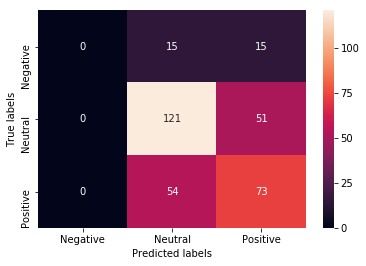

In [79]:
import matplotlib.pyplot as plt     
import seaborn as sns


import seaborn as sns
labels = ['Negative','Neutral', 'Positive']
ax = sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred), annot=True, xticklabels=labels, yticklabels=labels, fmt='g')
ax.set(xlabel='Predicted labels', ylabel='True labels')
ax.plot()


** Stacked LSTM **

In [83]:
from keras.layers import LSTM
from keras.optimizers import adamax

model_lstm = Sequential()

model_lstm.add(Embedding(max_features, 64, input_length=maxlen))
model_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model_lstm.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.summary()
model_lstm.compile(optimizer=adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 50, 64)            640000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 64)            33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 99        
Total params: 685,539
Trainable params: 685,539
Non-trainable params: 0
_________________________________________________________________


In [84]:
history = model_lstm.fit(x_train, y_train, epochs=20, batch_size=5, validation_split=0.2)

Train on 1052 samples, validate on 263 samples
Epoch 1/20
1052/1052 [==============================] - 13s 13ms/step - loss: 1.0653 - acc: 0.4705 - val_loss: 1.0260 - val_acc: 0.4981
Epoch 2/20
1052/1052 [==============================] - 14s 13ms/step - loss: 0.9580 - acc: 0.5048 - val_loss: 0.9098 - val_acc: 0.4981
Epoch 3/20
1052/1052 [==============================] - 15s 15ms/step - loss: 0.8890 - acc: 0.5038 - val_loss: 0.8879 - val_acc: 0.4981
Epoch 4/20
1052/1052 [==============================] - 15s 15ms/step - loss: 0.8810 - acc: 0.5048 - val_loss: 0.8782 - val_acc: 0.4981
Epoch 5/20
1052/1052 [==============================] - 16s 15ms/step - loss: 0.8780 - acc: 0.5038 - val_loss: 0.8696 - val_acc: 0.4981
Epoch 6/20
1052/1052 [==============================] - 16s 15ms/step - loss: 0.8705 - acc: 0.5067 - val_loss: 0.8615 - val_acc: 0.4905
Epoch 7/20
1052/1052 [==============================] - 16s 15ms/step - loss: 0.8552 - acc: 0.5295 - val_loss: 0.8542 - val_acc: 0.5323
E

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


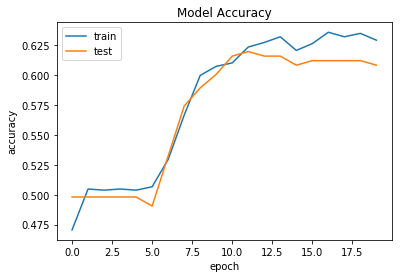

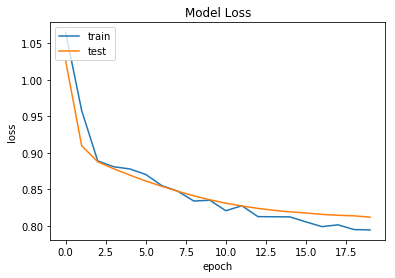

In [85]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [86]:
y_pred = model_lstm.predict(x_test)
y_pred

array([[0.0527857 , 0.5358396 , 0.41137463],
       [0.00857939, 0.91366154, 0.07775905],
       [0.00896366, 0.90937984, 0.08165645],
       [0.00901793, 0.90939534, 0.08158673],
       [0.08780676, 0.40405032, 0.50814295],
       [0.04785598, 0.55988   , 0.39226404],
       [0.10171065, 0.38020027, 0.51808906],
       [0.11336412, 0.36150324, 0.5251326 ],
       [0.0091479 , 0.90740764, 0.08344446],
       [0.17956835, 0.30988458, 0.510547  ],
       [0.15581936, 0.34992048, 0.49426022],
       [0.15457658, 0.3291929 , 0.51623046],
       [0.05126087, 0.5483315 , 0.40040764],
       [0.04519171, 0.584354  , 0.37045434],
       [0.00978887, 0.8985767 , 0.09163451],
       [0.12020411, 0.365727  , 0.5140689 ],
       [0.11172696, 0.3532564 , 0.53501666],
       [0.00908187, 0.9079227 , 0.08299558],
       [0.04963372, 0.5465813 , 0.40378493],
       [0.11382347, 0.35221973, 0.53395677],
       [0.00861983, 0.9139759 , 0.07740431],
       [0.11441781, 0.35238302, 0.53319925],
       [0.

In [87]:
y_pred = model_lstm.predict_classes(x_test)
y_pred 

array([1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,

In [90]:
print(classification_report(y_test.argmax(axis=1), y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        30
          1       0.76      0.60      0.67       172
          2       0.52      0.79      0.62       127

avg / total       0.60      0.62      0.59       329



C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[]

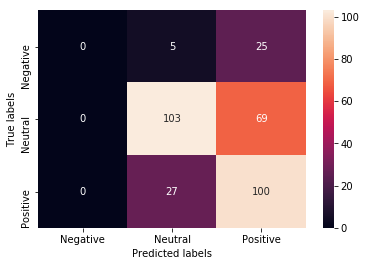

In [91]:
import matplotlib.pyplot as plt     
import seaborn as sns


import seaborn as sns
labels = ['Negative','Neutral', 'Positive']
ax = sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred), annot=True, xticklabels=labels, yticklabels=labels, fmt='g')
ax.set(xlabel='Predicted labels', ylabel='True labels')
ax.plot()


** Bideictional GRU **

In [92]:
from keras.layers import SpatialDropout1D, Bidirectional
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional

In [93]:
max_features = 10000
batch_size = 4
model_GRU = Sequential()

model_GRU.add(Embedding(max_features, 64, input_length=maxlen))
model_GRU.add(SpatialDropout1D(0.25))
model_GRU.add(Bidirectional(GRU(64)))
model_GRU.add(Dropout(0.25))

model_GRU.add(Dense(3, activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer=adam(lr=0.0004), metrics=['accuracy'])
model_GRU.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 50, 64)            640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 64)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               49536     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 387       
Total params: 689,923
Trainable params: 689,923
Non-trainable params: 0
_________________________________________________________________


In [94]:
history = model_GRU.fit(x_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 1052 samples, validate on 263 samples
Epoch 1/10
1052/1052 [==============================] - 13s 12ms/step - loss: 0.9082 - acc: 0.5456 - val_loss: 0.8250 - val_acc: 0.6046
Epoch 2/10
1052/1052 [==============================] - 15s 14ms/step - loss: 0.7759 - acc: 0.6606 - val_loss: 0.7741 - val_acc: 0.6502 0s - loss: 0.7763 - acc: 0.660
Epoch 3/10
1052/1052 [==============================] - 15s 14ms/step - loss: 0.6355 - acc: 0.7652 - val_loss: 0.7694 - val_acc: 0.6540
Epoch 4/10
1052/1052 [==============================] - 15s 14ms/step - loss: 0.4597 - acc: 0.8384 - val_loss: 0.8863 - val_acc: 0.6312
Epoch 5/10
1052/1052 [==============================] - 14s 13ms/step - loss: 0.3558 - acc: 0.8593 - val_loss: 0.9860 - val_acc: 0.6388
Epoch 6/10
1052/1052 [==============================] - 13s 12ms/step - loss: 0.2496 - acc: 0.9040 - val_loss: 1.1644 - val_acc: 0.6198
Epoch 7/10
1052/1052 [==============================] - 13s 13ms/step - loss: 0.1468 - acc: 0.9553 - val_l

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


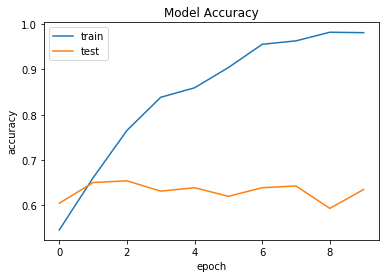

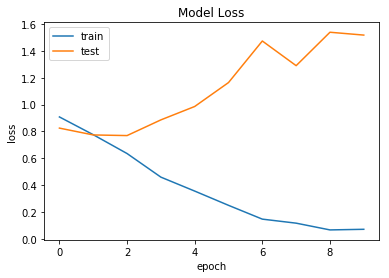

In [96]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [97]:
y_pred = model_lstm.predict_classes(x_test)
y_pred 

array([1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,

In [98]:
print(classification_report(y_test.argmax(axis=1), y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        30
          1       0.76      0.60      0.67       172
          2       0.52      0.79      0.62       127

avg / total       0.60      0.62      0.59       329



C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[]

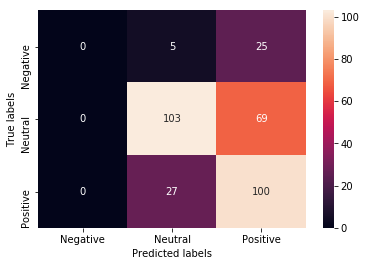

In [99]:
import matplotlib.pyplot as plt     
import seaborn as sns


import seaborn as sns
labels = ['Negative','Neutral', 'Positive']
ax = sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred), annot=True, xticklabels=labels, yticklabels=labels, fmt='g')
ax.set(xlabel='Predicted labels', ylabel='True labels')
ax.plot()


Predicting for GE with the Stacked LSTM model due to its good convergence 

In [111]:
transcript_GE = pd.read_json('GE_Earnings_Transcript.json')

transcript_GE.reset_index().drop(columns='index', axis=1).head()

,text,sentiment
0,"Good day, ladies and gentlemen and welcome to ...",Neutral
1,I would now like to turn the program over to y...,Neutral
2,Let's start with the outlook because investors...,Neutral
3,"Well Steve, I'd like to think that everything ...",Negative
4,"With respect to Baker Hughes, I mean we talked...",Negative


In [112]:
transcript_GE['sentiment'].isnull().sum()

0

In [115]:
from nltk.corpus import stopwords

transcript_GE['text'] = transcript_GE['text'].apply(lambda x: x.lower())
stop = stopwords.words('english')
transcript_GE['text'] = transcript_GE['text'].apply(lambda x : ' '.join(word for word in x.split() if word not in stop))
transcript_GE['text'] = transcript_GE['text'].apply(lambda x: ' '.join(word for word in x.split() if word.isalpha()))
transcript_GE['text'].head()

0      good ladies gentlemen welcome general electric...
1      would like turn program host steve winoker vic...
10     start outlook investors want know expect perfo...
100    well like think everything take strong view se...
101    respect baker mean talked part billion pool op...
Name: text, dtype: object

In [116]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

transcript_GE['text'] = transcript_GE['text'].apply(lambda x: ' '.join(lem.lemmatize(word, pos='a') for word in x.split()))
transcript_GE['text'] = transcript_GE['text'].apply(lambda x: ' '.join(lem.lemmatize(word, pos='v') for word in x.split()))
transcript_GE['text'] = transcript_GE['text'].apply(lambda x: ' '.join(lem.lemmatize(word, pos='n') for word in x.split()))
transcript_GE['text'].head()


0      good lady gentleman welcome general electric f...
1      would like turn program host steve winoker vic...
10     start outlook investor want know expect perfor...
100    well like think everything take strong view se...
101    respect baker mean talk part billion pool opti...
Name: text, dtype: object

In [118]:
transcript_GE = transcript_GE.reset_index().drop(columns='index', axis=1)

In [119]:
transcript_GE.head()

,text,sentiment
0,good lady gentleman welcome general electric f...,Neutral
1,would like turn program host steve winoker vic...,Neutral
2,start outlook investor want know expect perfor...,Neutral
3,well like think everything take strong view se...,Negative
4,respect baker mean talk part billion pool opti...,Negative


In [120]:
transcript_GE['sentiment'] = transcript_GE['sentiment'].apply(lambda x: x.lower())

In [124]:
tokeniz_ge = Tokenizer(num_words=10000)
tokeniz_ge.fit_on_texts(transcript_GE['text'])

In [129]:
seq = tokeniz_ge.texts_to_sequences(transcript_GE['text'])
X = pad_sequences(seq, maxlen=50)
X

array([[   0,    0,    0, ...,  373,  700,  373],
       [   0,    0,    0, ...,  102,    6,  490],
       [   0,    0,    0, ...,   36,   27,  104],
       ...,
       [   0,    0,    0, ...,    0,  128,    5],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,   34, 1201,  196]])

In [131]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
Y = l.fit_transform(transcript_GE['sentiment'])
Y

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1,
       1, 1, 0], dtype=int64)

In [133]:
from keras.utils import to_categorical

y_ge = to_categorical(Y,3)
y_ge

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1

In [134]:
y_pred_ge = model_lstm.predict_classes(X)
y_pred_ge

array([1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2], dtype=int64)

In [135]:
print(classification_report(Y, y_pred_ge))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        55
          1       0.93      0.76      0.84        91
          2       0.43      0.98      0.59        55

avg / total       0.54      0.61      0.54       201



C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[]

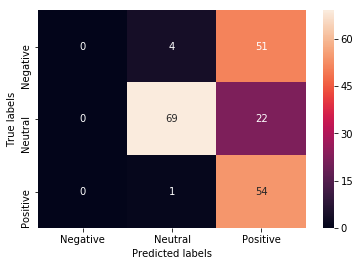

In [136]:
import matplotlib.pyplot as plt     
import seaborn as sns


import seaborn as sns
labels = ['Negative','Neutral', 'Positive']
ax = sns.heatmap(confusion_matrix(Y, y_pred_ge), annot=True, xticklabels=labels, yticklabels=labels, fmt='g')
ax.set(xlabel='Predicted labels', ylabel='True labels')
ax.plot()


In [141]:
y_pred_ge = model_GRU.predict_classes(X)
print(classification_report(Y, y_pred_ge))

             precision    recall  f1-score   support

          0       0.41      0.13      0.19        55
          1       0.64      0.68      0.66        91
          2       0.34      0.55      0.42        55

avg / total       0.50      0.49      0.47       201



Highest Prediction is given by Stacked LSTM 